# Лабораторная Работа №1
## Вариант 19

$
Y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

## Параметры равномерного распределения
![](./find-a-b.png)

In [14]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
from math import floor

max_n = 2000
a = -2
b = 4

## Получение вариационного ряда

In [15]:
def transform_x_to_y_func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(transform_x_to_y_func(x))
    return sorted(result)

x_sample = get_x_sample(a, b, max_n)

# Вариационный ряд y_sample
y_sample = get_y_sample(x_sample)

## Построение эмпирической функции распределения


|   Index |      Value |
|---------+------------|
|       0 | -1.2597    |
|       1 | -1.25539   |
|       2 | -1.25476   |
|       3 | -1.25447   |
|       4 | -1.25358   |
|       5 | -1.25181   |
|       6 | -1.25128   |
|       7 | -1.25035   |
|       8 | -1.2503    |
|       9 | -1.25028   |
|      10 | -1.25022   |
|      11 | -1.24945   |
|      12 | -1.24863   |
|      13 | -1.2483    |
|      14 | -1.24827   |
|      15 | -1.24821   |
|      16 | -1.24477   |
|      17 | -1.24374   |
|      18 | -1.24374   |
|      19 | -1.2425    |
|      20 | -1.24214   |
|      21 | -1.24211   |
|      22 | -1.24208   |
|      23 | -1.24133   |
|      24 | -1.24082   |
|      25 | -1.24024   |
|      26 | -1.23948   |
|      27 | -1.23885   |
|      28 | -1.23837   |
|      29 | -1.23798   |
|      30 | -1.23795   |
|      31 | -1.23794   |
|      32 | -1.23769   |
|      33 | -1.23429   |
|      34 | -1.23375   |
|      35 | -1.23357   |
|      36 | -1.23295   |
|      37 | -1.23279   |

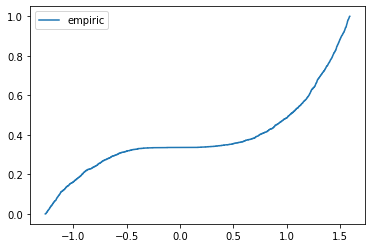

In [16]:
def render_table_view_y_sample(y_sample):
    print("\n" + tabulate([[index, y_sample[index]] for index in range(len(y_sample))], 
                    headers=['Index', 'Value'], 
                    tablefmt='orgtbl') + "\n")

def add_empiric_function_to_plot(y_sample):
    all = len(y_sample)
    y_axis = [0] + [cur / all for cur in range(all)] + [1]
    x_axis = [transform_x_to_y_func(a)] + [y for y in y_sample] + [transform_x_to_y_func(b)]
    plt.step(x_axis, y_axis, label="empiric")
    plt.legend()

render_table_view_y_sample(y_sample)

add_empiric_function_to_plot(y_sample) 
plt.show()

## Построение аналитической функции распределения

![](./analytical.jpg)

*опечатка, F(y)*

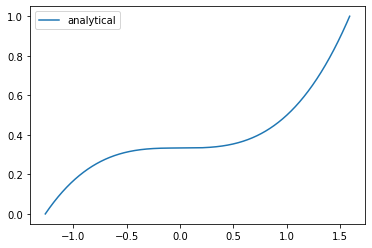

In [17]:
borderA = transform_x_to_y_func(a)
borderB = transform_x_to_y_func(b)

def analytical_func(y):    
    if y >= borderA and y <= borderB:
        return (1 / 6) * (y ** 3 - a)

    return 0 if y < borderA else 1

def add_analytical_function_to_plot(count):
    x_axis = np.linspace(borderA, borderB , count)
    y_axis = [analytical_func(x) for x in x_axis]
    plt.plot(x_axis, y_axis, label="analytical")
    plt.legend()

add_analytical_function_to_plot(1000)
plt.show()

## Сравнение эмпирической и аналитической функции распределения 

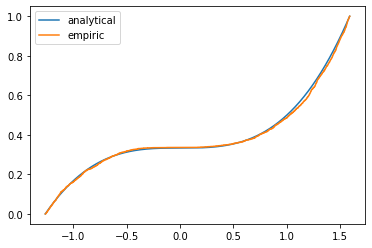

In [18]:
add_analytical_function_to_plot(1000)
add_empiric_function_to_plot(y_sample)
plt.show()